checking if the csv exists and is readable

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df_CarSales=pd.read_csv("CarSales.csv")
df_CarSales.head()

,date of sale,sale price,sales tax,total miles,model,dealership
0,1960-04-04,309665.73,13572.01,18,Spark,A1 Auto
1,1935-01-14,366732.42,10472.19,20,Corvette,Mike Murphy Car Lot
2,1918-04-08,Missing,6764.59,19,Monte Carlo,Indiana Hoosiers Car Sales
3,1996-04-19,176235.86,9456.98,22,Impala,A1 Auto
4,1913-09-30,224321.5,1391.01,22,Volt,Sam Smith Auto


Checking total no of rows pre-cleaning

In [3]:
num_rows = len(df_CarSales.index)

print("Number of rows in CarSales.csv file:", num_rows)

Number of rows in CarSales.csv file: 498


check for missing values

In [4]:
print(df_CarSales.isnull().values.any())

True


In [5]:
print(df_CarSales.isnull().sum())

date of sale    5
sale price      2
sales tax       1
total miles     3
model           3
dealership      4
dtype: int64


removing rows with missing values

In [6]:
df_CarSales.dropna(inplace=True)

total no of rows post removing rows with missing values

In [7]:
num_rows = len(df_CarSales.index)

print("Number of rows in CarSales.csv file:", num_rows)

Number of rows in CarSales.csv file: 480


In [8]:
print(df_CarSales.isnull().values.any())
print(df_CarSales.isnull().sum())

False
date of sale    0
sale price      0
sales tax       0
total miles     0
model           0
dealership      0
dtype: int64


Removing duplicate rows, if any

In [9]:
df_CarSales.drop_duplicates(inplace=True)

In [10]:
num_rows = len(df_CarSales.index)

print("Number of rows in CarSales.csv file:", num_rows)

Number of rows in CarSales.csv file: 480


no duplicates found

replacing nans and nones with '0'

In [11]:
df_CarSales = df_CarSales.replace('Missing', 0)

In [12]:
df_CarSales = df_CarSales.replace('nan', 0)

In [13]:
df_CarSales = df_CarSales.replace('None', 0)

In [14]:
df_CarSales.head()

,date of sale,sale price,sales tax,total miles,model,dealership
0,1960-04-04,309665.73,13572.01,18,Spark,A1 Auto
1,1935-01-14,366732.42,10472.19,20,Corvette,Mike Murphy Car Lot
2,1918-04-08,0,6764.59,19,Monte Carlo,Indiana Hoosiers Car Sales
3,1996-04-19,176235.86,9456.98,22,Impala,A1 Auto
4,1913-09-30,224321.5,1391.01,22,Volt,Sam Smith Auto


Remove whitespace and other unwanted characters from column names:

In [15]:
df_CarSales.columns = df_CarSales.columns.str.strip().str.replace(' ', '_').str.lower()
df_CarSales.head()

,date_of_sale,sale_price,sales_tax,total_miles,model,dealership
0,1960-04-04,309665.73,13572.01,18,Spark,A1 Auto
1,1935-01-14,366732.42,10472.19,20,Corvette,Mike Murphy Car Lot
2,1918-04-08,0,6764.59,19,Monte Carlo,Indiana Hoosiers Car Sales
3,1996-04-19,176235.86,9456.98,22,Impala,A1 Auto
4,1913-09-30,224321.5,1391.01,22,Volt,Sam Smith Auto


Remove leading/trailing whitespace from all columns:

In [16]:
df_CarSales = df_CarSales.applymap(lambda x: x.strip() if isinstance(x, str) else x)

saving cleaned df to a new df and downloading cleaned csv 

In [17]:

df_CarSales_cleaned = df_CarSales.drop_duplicates()


print(df_CarSales_cleaned.head())

  date_of_sale sale_price sales_tax total_miles        model  \
0   1960-04-04  309665.73  13572.01          18        Spark   
1   1935-01-14  366732.42  10472.19          20     Corvette   
2   1918-04-08          0   6764.59          19  Monte Carlo   
3   1996-04-19  176235.86   9456.98          22       Impala   
4   1913-09-30   224321.5   1391.01          22         Volt   

                   dealership  
0                     A1 Auto  
1         Mike Murphy Car Lot  
2  Indiana Hoosiers Car Sales  
3                     A1 Auto  
4              Sam Smith Auto  


total no of rows post cleaning

In [18]:
num_rows = len(df_CarSales_cleaned.index)

print("Number of rows in df_CarSales.csv file:", num_rows)

Number of rows in df_CarSales.csv file: 480


checking datatypes and changing datatype from object to float/int for plotting scatterplots

In [19]:
print(df_CarSales_cleaned.dtypes)

date_of_sale    object
sale_price      object
sales_tax       object
total_miles     object
model           object
dealership      object
dtype: object


In [20]:
df_CarSales_cleaned.replace('', np.nan, inplace=True)

df_CarSales_cleaned = df_CarSales.dropna()


In [21]:
df_CarSales_cleaned.dropna(subset=['sale_price'], inplace=True)




In [22]:



df_CarSales_cleaned['sale_price'] = df_CarSales_cleaned['sale_price'].replace('', np.nan)
df_CarSales_cleaned['sale_price'] = df_CarSales_cleaned['sale_price'].astype(float)



In [23]:
df_CarSales_cleaned['sale_price'] = df_CarSales_cleaned['sale_price'].astype(float)

In [24]:


df_CarSales_cleaned['sales_tax'] = df_CarSales_cleaned['sales_tax'].replace('', np.nan).astype(float)



In [25]:


df_CarSales_cleaned['total_miles'] = df_CarSales_cleaned['total_miles'].replace('', np.nan).astype(float)



In [26]:
print(df_CarSales_cleaned.dtypes)

date_of_sale     object
sale_price      float64
sales_tax       float64
total_miles     float64
model            object
dealership       object
dtype: object


mean and std dev :

In [27]:
stats = df_CarSales_cleaned.describe().loc[['mean', 'std']]
print(stats)

         sale_price    sales_tax  total_miles
mean  212932.962213  6933.955987    19.427673
std   108009.720589  4482.607707     5.493073


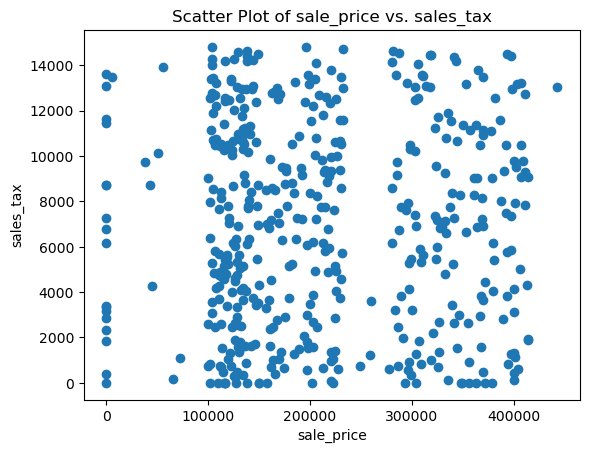

In [28]:
plt.scatter(df_CarSales_cleaned['sale_price'], df_CarSales_cleaned['sales_tax'])

plt.xlabel('sale_price')
plt.ylabel('sales_tax')
plt.title('Scatter Plot of sale_price vs. sales_tax')

# show the plot
plt.show()

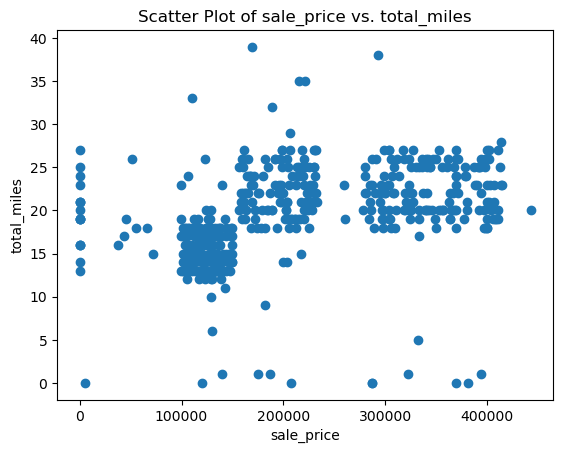

In [29]:
plt.scatter(df_CarSales_cleaned['sale_price'], df_CarSales_cleaned['total_miles'])

plt.xlabel('sale_price')
plt.ylabel('total_miles')
plt.title('Scatter Plot of sale_price vs. total_miles')

# show the plot
plt.show()

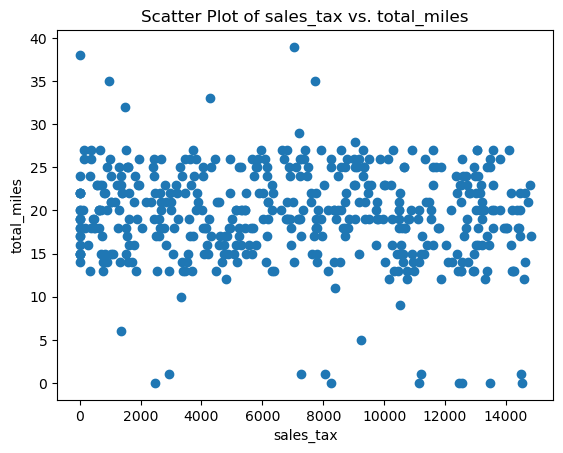

In [30]:
plt.scatter(df_CarSales_cleaned['sales_tax'], df_CarSales_cleaned['total_miles'])

plt.xlabel('sales_tax')
plt.ylabel('total_miles')
plt.title('Scatter Plot of sales_tax vs. total_miles')

# show the plot
plt.show()

download cleaned dataframe as csv

In [31]:
df_CarSales_cleaned.to_csv('CarSalesFinal.csv', index=False)
from IPython.display import FileLink
display(FileLink('CarSalesFinal.csv'))

C:\Users\HP\Music\CarSalesFinal.csv